# 🌳🌳**BIRZEIT UNIVERSITY**🌳🌳


> # **Electrical and Computer Engineering Department**


> # **ENCS5343 Computer Vision**

# **Course Project**

# **Partneres** :

**Shereen Ibdah - 1200373**
**Amr Halahla - 1200902**

# **Dataset Preparation**

## Import Libraries

In [1]:
# Import necessary libraries
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Add, Input, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical


In [2]:
# Define constants
IMG_SIZE = (128, 128)  # Image size (width, height)
input_shape = IMG_SIZE + (1,)  # Grayscale images have 1 channel

## Uncompress the Dataset

In [3]:
# Update the dataset path based on Kaggle's "Data" tab
dataset_path = "/kaggle/input/dataset/isolated_words_per_user"  # Replace with the actual Kaggle dataset path

# Check if the dataset exists
if os.path.exists(dataset_path):
    print(f"Dataset found at {dataset_path}")
else:
    print(f"Dataset not found. Please check the path!")

Dataset found at /kaggle/input/dataset/isolated_words_per_user


## Load the Dataset and Preporocess the Images 

In [4]:
# Helper function to preprocess images
def preprocess_image(image_path, img_size=IMG_SIZE):
    # Read image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize to the desired size
    img = cv2.resize(img, img_size)
    # Normalize pixel values to [0, 1]
    return img / 255.0

# Load the dataset and organize into features (X) and labels (y)
def load_dataset(dataset_path, img_size=IMG_SIZE):
    X = []  # List to store images
    y = []  # List to store labels (writer IDs)
    
    # Iterate through each user's folder
    for user_folder in os.listdir(dataset_path):
        user_path = os.path.join(dataset_path, user_folder)
        if os.path.isdir(user_path):
            label = user_folder  # Writer ID is the folder name
            for img_file in os.listdir(user_path):
                img_path = os.path.join(user_path, img_file)
                # Preprocess image and append to the list
                X.append(preprocess_image(img_path, img_size))
                y.append(label)
    
    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(dataset_path)

# Perform train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

del X
del y

Training set size: 4886
Validation set size: 1629
Test set size: 1629


# Task 1: Building and Training a Custom CNN Network

## Prepare the Data for Training

In [5]:
# Reshape the dataset for 128x128 grayscale images
X_train_reshaped = X_train.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
X_val_reshaped = X_val.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
X_test_reshaped = X_test.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)

# Encode labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

# One-hot encode the labels
y_train_cat = to_categorical(y_train_enc)
y_val_cat = to_categorical(y_val_enc)
y_test_cat = to_categorical(y_test_enc)

# Number of classes
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

del y_train_enc
del y_val_enc
del y_test_enc

Number of classes: 82


## Architecture 1 - 4 Conv + 2 FC

In [6]:
def create_cnn_4conv_2fc(input_shape, num_classes):
    model = Sequential([
        # Convolutional Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 4
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

## Architecture 2: 4 Conv + 3 FC

In [7]:
def create_cnn_4conv_3fc(input_shape, num_classes):
    model = Sequential([
        # Convolutional Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 4
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.1),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

## Architecture 3: 5 Conv + 2 FC

In [8]:
def create_cnn_5conv_2fc(input_shape, num_classes):
    model = Sequential([
        # Convolutional Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 4
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 5
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

## Architecture 4: 5 Conv + 3 FC

In [9]:
def create_cnn_5conv_3fc(input_shape, num_classes):
    model = Sequential([
        # Convolutional Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 4
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 5
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.1),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model


## Architecture 5: Wider 5 Conv + 2 FC

In [10]:
def create_cnn_5conv_2fc_wider(input_shape, num_classes):
    model = Sequential([
        # Convolutional Block 1
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 3
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 4
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 5
        Conv2D(1024, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

## Architecture 6: Deeper 6 Conv + 2 FC

In [11]:
def create_cnn_6conv_2fc_deeper(input_shape, num_classes):
    model = Sequential([
        # Convolutional Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 4
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 5
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 6
        Conv2D(1024, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

## Automated Execution

In [12]:
# # Configuration
# architectures = [
#     ("4Conv + 2FC", create_cnn_4conv_2fc),
#     ("4Conv + 3FC", create_cnn_4conv_3fc),
#     ("5Conv + 2FC", create_cnn_5conv_2fc),
#     ("5Conv + 3FC", create_cnn_5conv_3fc),
#     ("Wider 5Conv + 2FC", create_cnn_5conv_2fc_wider),
#     ("Deeper 6Conv + 2FC", create_cnn_6conv_2fc_deeper),
# ]

# results = []

# # Train and evaluate each architecture
# for name, architecture_fn in architectures:
#     print("==================================\n")
#     print(f"Training {name}...")

#     # Reinitialize the model for each architecture
#     model = architecture_fn(X_train_reshaped.shape[1:], y_train_cat.shape[1])
#     model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

#     # Define callbacks for each run to ensure isolation
#     early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
#     lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

#     # Train the model
#     history = model.fit(
#         X_train_reshaped, y_train_cat,
#         validation_data=(X_val_reshaped, y_val_cat),
#         epochs=100,
#         callbacks=[early_stopping, lr_scheduler],
#         verbose=1
#     )

#     # Evaluate the model
#     test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_cat, verbose=1)

#     # Store results
#     results.append({
#         'name': name,
#         'history': history.history,
#         'test_loss': test_loss,
#         'test_accuracy': test_accuracy,
#         'epochs': len(history.history['loss'])  # Track the number of epochs used
#     })

#     print(f"{name} - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Epochs: {len(history.history['loss'])}")


In [13]:
# Architecture 1: 4 Conv + 2 FC
print("==================================\nTraining 4Conv + 2FC...\n")

model_4conv_2fc = create_cnn_4conv_2fc(X_train_reshaped.shape[1:], y_train_cat.shape[1])
model_4conv_2fc.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history_4conv_2fc = model_4conv_2fc.fit(
    X_train_reshaped, y_train_cat,
    validation_data=(X_val_reshaped, y_val_cat),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the model
test_loss_4conv_2fc, test_accuracy_4conv_2fc = model_4conv_2fc.evaluate(X_test_reshaped, y_test_cat, verbose=1)
epochs_4conv_2fc = len(history_4conv_2fc.history['loss'])

# Store results
results = []
results.append({
    'name': "4Conv + 2FC",
    'history': history_4conv_2fc.history,
    'test_loss': test_loss_4conv_2fc,
    'test_accuracy': test_accuracy_4conv_2fc,
    'epochs': epochs_4conv_2fc
})

print(f"4Conv + 2FC - Test Loss: {test_loss_4conv_2fc}, Test Accuracy: {test_accuracy_4conv_2fc}, Epochs: {epochs_4conv_2fc}")


Training 4Conv + 2FC...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 99ms/step - accuracy: 0.0364 - loss: 4.2217 - val_accuracy: 0.0123 - val_loss: 10.2486 - learning_rate: 5.0000e-04
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2105 - loss: 2.9239 - val_accuracy: 0.0123 - val_loss: 14.0406 - learning_rate: 5.0000e-04
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3189 - loss: 2.3016 - val_accuracy: 0.0123 - val_loss: 46.7944 - learning_rate: 5.0000e-04
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4308 - loss: 1.8689 - val_accuracy: 0.0123 - val_loss: 73.4121 - learning_rate: 5.0000e-04
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5047 - loss: 1.5478 - val_accuracy: 0.0147 - val_loss: 59.1517 - learning_rate: 5.0000e-04
Epoch 6/100
151/153 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6289 - loss: 1.1909
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/ste

In [14]:
# Architecture 2: 4 Conv + 3 FC
print("==================================\nTraining 4Conv + 3FC...\n")

model_4conv_3fc = create_cnn_4conv_3fc(X_train_reshaped.shape[1:], y_train_cat.shape[1])
model_4conv_3fc.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history_4conv_3fc = model_4conv_3fc.fit(
    X_train_reshaped, y_train_cat,
    validation_data=(X_val_reshaped, y_val_cat),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the model
test_loss_4conv_3fc, test_accuracy_4conv_3fc = model_4conv_3fc.evaluate(X_test_reshaped, y_test_cat, verbose=1)
epochs_4conv_3fc = len(history_4conv_3fc.history['loss'])

# Store results
results.append({
    'name': "4Conv + 3FC",
    'history': history_4conv_3fc.history,
    'test_loss': test_loss_4conv_3fc,
    'test_accuracy': test_accuracy_4conv_3fc,
    'epochs': epochs_4conv_3fc
})

print(f"4Conv + 3FC - Test Loss: {test_loss_4conv_3fc}, Test Accuracy: {test_accuracy_4conv_3fc}, Epochs: {epochs_4conv_3fc}")


Training 4Conv + 3FC...

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.0243 - loss: 4.3296 - val_accuracy: 0.0123 - val_loss: 6.1699 - learning_rate: 5.0000e-04
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1352 - loss: 3.3472 - val_accuracy: 0.0160 - val_loss: 18.0009 - learning_rate: 5.0000e-04
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2312 - loss: 2.6553 - val_accuracy: 0.0123 - val_loss: 20.3566 - learning_rate: 5.0000e-04
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3199 - loss: 2.2275 - val_accuracy: 0.0123 - val_loss: 102.5778 - learning_rate: 5.0000e-04
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3807 - loss: 1.9627 - val_accuracy: 0.0141 - val_loss: 98.7718 - learning_rate: 5.0000e-04
Epoch 6/100
151/153 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4672 - loss: 1.7175
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
153/153 ━━━━━━━

In [15]:
# Architecture 3: 5 Conv + 2 FC
print("==================================\nTraining 5Conv + 2FC...\n")

model_5conv_2fc = create_cnn_5conv_2fc(X_train_reshaped.shape[1:], y_train_cat.shape[1])
model_5conv_2fc.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history_5conv_2fc = model_5conv_2fc.fit(
    X_train_reshaped, y_train_cat,
    validation_data=(X_val_reshaped, y_val_cat),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the model
test_loss_5conv_2fc, test_accuracy_5conv_2fc = model_5conv_2fc.evaluate(X_test_reshaped, y_test_cat, verbose=1)
epochs_5conv_2fc = len(history_5conv_2fc.history['loss'])

# Store results
results.append({
    'name': "5Conv + 2FC",
    'history': history_5conv_2fc.history,
    'test_loss': test_loss_5conv_2fc,
    'test_accuracy': test_accuracy_5conv_2fc,
    'epochs': epochs_5conv_2fc
})

print(f"5Conv + 2FC - Test Loss: {test_loss_5conv_2fc}, Test Accuracy: {test_accuracy_5conv_2fc}, Epochs: {epochs_5conv_2fc}")


Training 5Conv + 2FC...

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.0559 - loss: 4.1558 - val_accuracy: 0.0123 - val_loss: 10.1634 - learning_rate: 5.0000e-04
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2559 - loss: 2.6890 - val_accuracy: 0.0123 - val_loss: 30.4456 - learning_rate: 5.0000e-04
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4361 - loss: 1.9445 - val_accuracy: 0.0129 - val_loss: 8.2406 - learning_rate: 5.0000e-04
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5717 - loss: 1.4508 - val_accuracy: 0.0123 - val_loss: 27.0789 - learning_rate: 5.0000e-04
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6813 - loss: 1.0699 - val_accuracy: 0.0123 - val_loss: 34.3897 - learning_rate: 5.0000e-04
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7801 - loss: 0.7138 - val_accuracy: 0.0282 - val_loss: 44.1386 - learning_rate: 5.0000e-04
Epoch 7/100
153/153 ━

In [16]:
# Architecture 4: 5 Conv + 3 FC
print("==================================\nTraining 5Conv + 3FC...\n")

model_5conv_3fc = create_cnn_5conv_3fc(X_train_reshaped.shape[1:], y_train_cat.shape[1])
model_5conv_3fc.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history_5conv_3fc = model_5conv_3fc.fit(
    X_train_reshaped, y_train_cat,
    validation_data=(X_val_reshaped, y_val_cat),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the model
test_loss_5conv_3fc, test_accuracy_5conv_3fc = model_5conv_3fc.evaluate(X_test_reshaped, y_test_cat, verbose=1)
epochs_5conv_3fc = len(history_5conv_3fc.history['loss'])

# Store results
results.append({
    'name': "5Conv + 3FC",
    'history': history_5conv_3fc.history,
    'test_loss': test_loss_5conv_3fc,
    'test_accuracy': test_accuracy_5conv_3fc,
    'epochs': epochs_5conv_3fc
})

print(f"5Conv + 3FC - Test Loss: {test_loss_5conv_3fc}, Test Accuracy: {test_accuracy_5conv_3fc}, Epochs: {epochs_5conv_3fc}")

Training 5Conv + 3FC...

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.0274 - loss: 4.3245 - val_accuracy: 0.0123 - val_loss: 9.4739 - learning_rate: 5.0000e-04
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.1747 - loss: 3.1693 - val_accuracy: 0.0123 - val_loss: 18.5475 - learning_rate: 5.0000e-04
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.3236 - loss: 2.3673 - val_accuracy: 0.0123 - val_loss: 26.1580 - learning_rate: 5.0000e-04
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4308 - loss: 1.8997 - val_accuracy: 0.0123 - val_loss: 14.9258 - learning_rate: 5.0000e-04
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5111 - loss: 1.5570 - val_accuracy: 0.0129 - val_loss: 19.8772 - learning_rate: 5.0000e-04
Epoch 6/100
151/153 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5921 - loss: 1.2783
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
153/153 ━━━━━━━━

In [17]:
# Architecture 5: Wider 5 Conv + 2 FC
print("==================================\nTraining Wider 5Conv + 2FC...\n")

model_5conv_2fc_wider = create_cnn_5conv_2fc_wider(X_train_reshaped.shape[1:], y_train_cat.shape[1])
model_5conv_2fc_wider.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history_5conv_2fc_wider = model_5conv_2fc_wider.fit(
    X_train_reshaped, y_train_cat,
    validation_data=(X_val_reshaped, y_val_cat),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the model
test_loss_5conv_2fc_wider, test_accuracy_5conv_2fc_wider = model_5conv_2fc_wider.evaluate(X_test_reshaped, y_test_cat, verbose=1)
epochs_5conv_2fc_wider = len(history_5conv_2fc_wider.history['loss'])

# Store results
results.append({
    'name': "Wider 5Conv + 2FC",
    'history': history_5conv_2fc_wider.history,
    'test_loss': test_loss_5conv_2fc_wider,
    'test_accuracy': test_accuracy_5conv_2fc_wider,
    'epochs': epochs_5conv_2fc_wider
})

print(f"Wider 5Conv + 2FC - Test Loss: {test_loss_5conv_2fc_wider}, Test Accuracy: {test_accuracy_5conv_2fc_wider}, Epochs: {epochs_5conv_2fc_wider}")

Training Wider 5Conv + 2FC...

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 38s 164ms/step - accuracy: 0.0540 - loss: 4.1716 - val_accuracy: 0.0123 - val_loss: 13.0393 - learning_rate: 5.0000e-04
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.2604 - loss: 2.6339 - val_accuracy: 0.0123 - val_loss: 32.0160 - learning_rate: 5.0000e-04
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.4130 - loss: 2.0516 - val_accuracy: 0.0123 - val_loss: 39.4264 - learning_rate: 5.0000e-04
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.5275 - loss: 1.5286 - val_accuracy: 0.0123 - val_loss: 31.3726 - learning_rate: 5.0000e-04
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.6535 - loss: 1.1256 - val_accuracy: 0.0688 - val_loss: 6.8586 - learning_rate: 5.0000e-04
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.7591 - loss: 0.7765 - val_accuracy: 0.0123 - val_loss: 32.0744 - learning_rate: 5.0000e-04
Epoch 7/100
15

In [18]:
# Architecture 6: Deeper 6 Conv + 2 FC
print("==================================\nTraining Deeper 6Conv + 2FC...\n")

model_6conv_2fc_deeper = create_cnn_6conv_2fc_deeper(X_train_reshaped.shape[1:], y_train_cat.shape[1])
model_6conv_2fc_deeper.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history_6conv_2fc_deeper = model_6conv_2fc_deeper.fit(
    X_train_reshaped, y_train_cat,
    validation_data=(X_val_reshaped, y_val_cat),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the model
test_loss_6conv_2fc_deeper, test_accuracy_6conv_2fc_deeper = model_6conv_2fc_deeper.evaluate(X_test_reshaped, y_test_cat, verbose=1)
epochs_6conv_2fc_deeper = len(history_6conv_2fc_deeper.history['loss'])

# Store results
results.append({
    'name': "Deeper 6Conv + 2FC",
    'history': history_6conv_2fc_deeper.history,
    'test_loss': test_loss_6conv_2fc_deeper,
    'test_accuracy': test_accuracy_6conv_2fc_deeper,
    'epochs': epochs_6conv_2fc_deeper
})

print(f"Deeper 6Conv + 2FC - Test Loss: {test_loss_6conv_2fc_deeper}, Test Accuracy: {test_accuracy_6conv_2fc_deeper}, Epochs: {epochs_6conv_2fc_deeper}")

Training Deeper 6Conv + 2FC...

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.0581 - loss: 4.2450 - val_accuracy: 0.0123 - val_loss: 12.3032 - learning_rate: 5.0000e-04
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.2340 - loss: 2.8452 - val_accuracy: 0.0141 - val_loss: 18.8184 - learning_rate: 5.0000e-04
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4133 - loss: 2.0244 - val_accuracy: 0.0368 - val_loss: 6.9656 - learning_rate: 5.0000e-04
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5283 - loss: 1.5597 - val_accuracy: 0.0123 - val_loss: 26.7824 - learning_rate: 5.0000e-04
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6218 - loss: 1.2178 - val_accuracy: 0.0129 - val_loss: 28.8771 - learning_rate: 5.0000e-04
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7305 - loss: 0.8602 - val_accuracy: 0.0890 - val_loss: 11.7747 - learning_rate: 5.0000e-04
Epoch 7/100
1

In [19]:

# Create a DataFrame to display results
results_df = pd.DataFrame([
    {
        "Architecture": result['name'],
        "Test Loss": result['test_loss'],
        "Test Accuracy": result['test_accuracy'],
        "Epochs Taken": result['epochs']
    }
    for result in results
])

# Display the table
print("=== Comparison of Architectures ===")
print(results_df)

=== Comparison of Architectures ===
         Architecture  Test Loss  Test Accuracy  Epochs Taken
0         4Conv + 2FC   0.584185       0.828729            74
1         4Conv + 3FC   1.323367       0.653161            39
2         5Conv + 2FC   0.514813       0.860037            87
3         5Conv + 3FC   0.787411       0.796808            91
4   Wider 5Conv + 2FC   0.315841       0.907919            89
5  Deeper 6Conv + 2FC   0.670207       0.819521            30


## Plot Training and Validation Curves

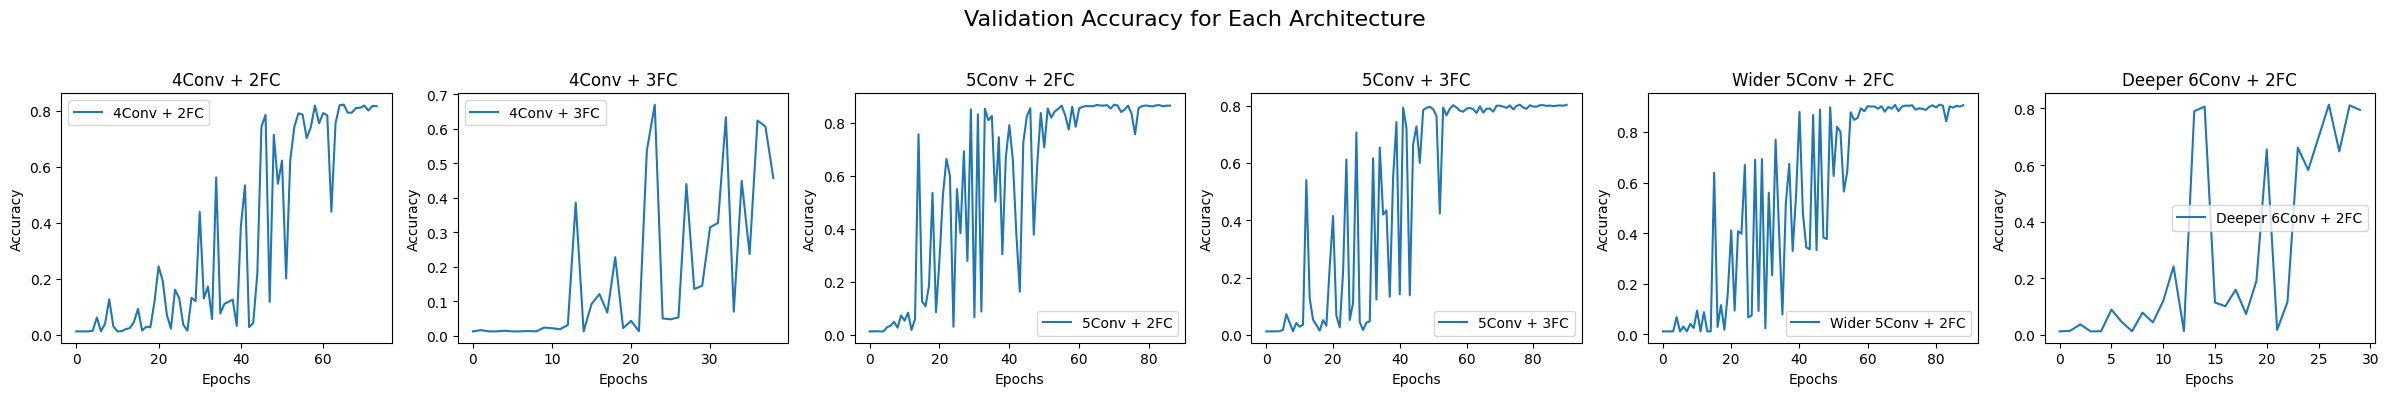

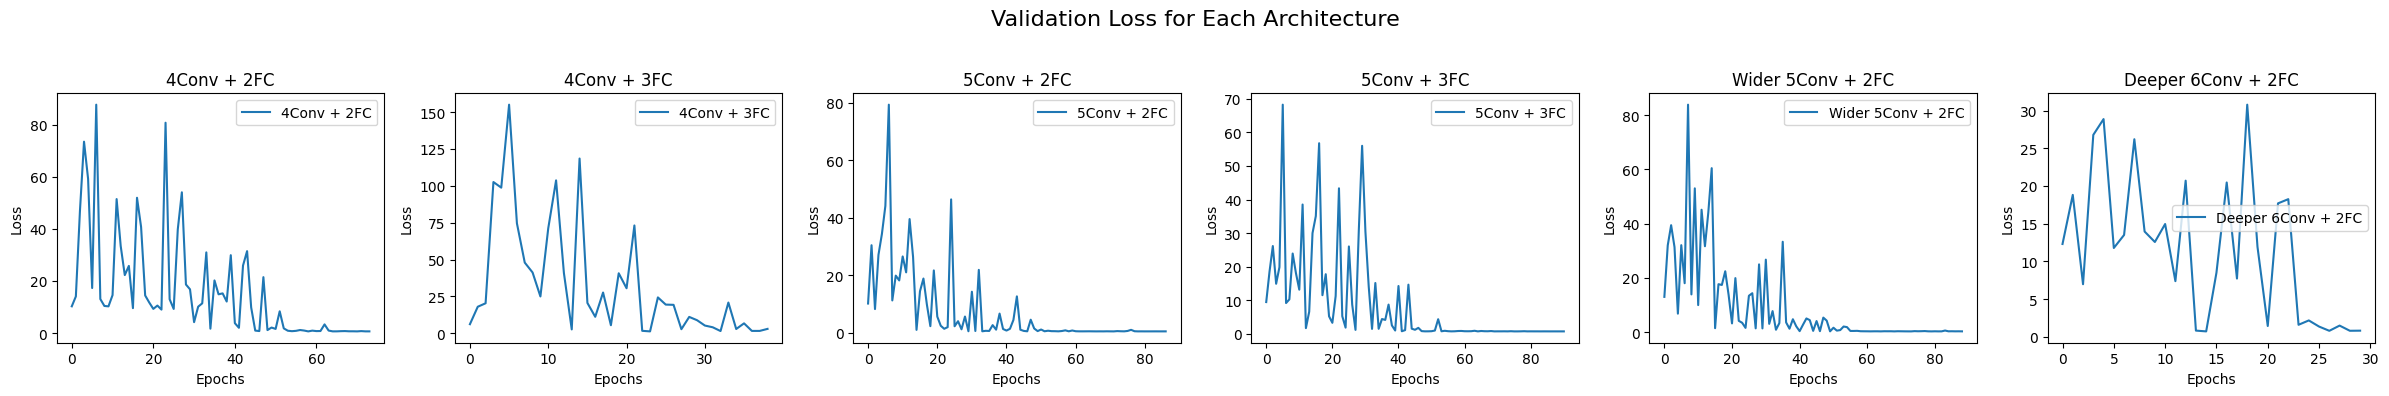

In [21]:
# Define the number of architectures
num_architectures = len(results)

# Create subplots for Validation Accuracy
fig, axes = plt.subplots(1, num_architectures, figsize=(24, 4))
fig.suptitle("Validation Accuracy for Each Architecture", fontsize=16)

for ax, result in zip(axes, results):
    ax.plot(result['history']['val_accuracy'], label=f"{result['name']}")
    ax.set_title(result['name'])
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the main title
plt.show()

# Create subplots for Validation Loss
fig, axes = plt.subplots(1, num_architectures, figsize=(24, 4))
fig.suptitle("Validation Loss for Each Architecture", fontsize=16)

for ax, result in zip(axes, results):
    ax.plot(result['history']['val_loss'], label=f"{result['name']}")
    ax.set_title(result['name'])
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the main title
plt.show()


# Task 2: Data Augmentation Integration.

## Import Necessary Libraries

In [6]:
# Import necessary libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Define Data Augmentation

In [7]:
# Function to apply specific augmentations
def augment_images_and_labels(X, y, augmentation_type, value):
    augmented_images = []
    augmented_labels = []
    
    for img, label in zip(X, y):
        img = img.reshape(IMG_SIZE[0], IMG_SIZE[1])  # Reshape the image to 2D
        if augmentation_type == "rotate":
            M = cv2.getRotationMatrix2D((IMG_SIZE[0] // 2, IMG_SIZE[1] // 2), value, 1)
            augmented = cv2.warpAffine(img, M, (IMG_SIZE[0], IMG_SIZE[1]))
        elif augmentation_type == "shift":
            M = np.float32([[1, 0, value], [0, 1, value]])
            augmented = cv2.warpAffine(img, M, (IMG_SIZE[0], IMG_SIZE[1]))
        elif augmentation_type == "zoom":
            zoom_factor = 1 + value
            augmented = cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor)
            crop_x = (augmented.shape[0] - IMG_SIZE[0]) // 2
            crop_y = (augmented.shape[1] - IMG_SIZE[1]) // 2
            augmented = augmented[crop_x:crop_x + IMG_SIZE[0], crop_y:crop_y + IMG_SIZE[1]]
        elif augmentation_type == "noise":
            noise = np.random.normal(0, value, img.shape)
            augmented = img + noise
            augmented = np.clip(augmented, 0, 1)
        augmented_images.append(augmented.reshape(IMG_SIZE[0], IMG_SIZE[1], 1))  # Reshape back to 3D
        augmented_labels.append(label)  # Append the corresponding label

    return np.array(augmented_images), np.array(augmented_labels)

## Define Data Augmentation for Training

In [8]:
# Ensure X_train has the same number of dimensions as the augmented datasets
X_train = X_train.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)

# Augment training data with different techniques
X_train_rotated, y_train_rotated = augment_images_and_labels(X_train, y_train_cat, "rotate", 10)
X_train_shifted, y_train_shifted = augment_images_and_labels(X_train, y_train_cat, "shift", 5)
# X_train_zoomed, y_train_zoomed = augment_images_and_labels(X_train, y_train_cat, "zoom", 0.2)
X_train_noisy, y_train_noisy = augment_images_and_labels(X_train, y_train_cat, "noise", 0.05)

# Combine original and augmented training data
# X_train_augmented = np.concatenate((X_train, X_train_rotated, X_train_shifted, X_train_zoomed, X_train_noisy), axis=0)
# y_train_augmented = np.concatenate((y_train_cat, y_train_rotated, y_train_shifted, y_train_zoomed, y_train_noisy), axis=0)

X_train_augmented = np.concatenate((X_train, X_train_rotated, X_train_shifted, X_train_noisy), axis=0)
y_train_augmented = np.concatenate((y_train_cat, y_train_rotated, y_train_shifted, y_train_noisy), axis=0)

# Verify sizes
print(f"Augmented Training Dataset Size: {X_train_augmented.shape}")
print(f"Augmented Training Labels Size: {y_train_augmented.shape}")

del X_train_rotated
del y_train_rotated
del X_train_shifted
del y_train_shifted
# del X_train_zoomed
# del y_train_zoomed
del X_train_noisy
del y_train_noisy
del X_train
del y_train_cat

Augmented Training Dataset Size: (19544, 128, 128, 1)
Augmented Training Labels Size: (19544, 82)


## Prepare Augmented Test Sets

In [13]:
# # Function to generate a comprehensive augmented test dataset
# def generate_augmented_test(X_test, y_test):
#     # Augment test data with different techniques
#     X_test_rotated, y_test_rotated = augment_images_and_labels(X_test, y_test, "rotate", 10)
#     X_test_shifted, y_test_shifted = augment_images_and_labels(X_test, y_test, "shift", 5)
#     X_test_zoomed, y_test_zoomed = augment_images_and_labels(X_test, y_test, "zoom", 0.2)
#     X_test_noisy, y_test_noisy = augment_images_and_labels(X_test, y_test, "noise", 0.05)

#     # Combine original and augmented test datasets
#     X_test_augmented = np.concatenate((X_test, X_test_rotated, X_test_shifted, X_test_zoomed, X_test_noisy), axis=0)
#     y_test_augmented = np.concatenate((y_test, y_test_rotated, y_test_shifted, y_test_zoomed, y_test_noisy), axis=0)

#     # Verify sizes
#     print(f"Augmented Test Dataset Size: {X_test_augmented.shape}")
#     print(f"Augmented Test Labels Size: {y_test_augmented.shape}")

#     return X_test_augmented, y_test_augmented

# # Generate the comprehensive augmented test dataset
# X_test_augmented, y_test_augmented = generate_augmented_test(X_test_reshaped, y_test_cat)

## Define and Compile the Model

In [25]:
def create_cnn_5conv_2fc_gap(input_shape, num_classes):
    model = Sequential([
        # Convolutional Block 1
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 3
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 4
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Block 5
        Conv2D(1024, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

## Train the Model

In [26]:
model = create_cnn_5conv_2fc_gap(input_shape, num_classes)
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model with augmented training data
history = model.fit(
    X_train_augmented, y_train_augmented,
    validation_data=(X_val_reshaped, y_val_cat),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 128, 128, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 8, 8, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 8, 8, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 4, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,954,578 (26.53 MB)

 Trainable params: 6,950,610 (26.51 MB)

 Non-trainable params: 3,968 (15.50 KB)

Epoch 1/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - accuracy: 0.1245 - loss: 3.6282 - val_accuracy: 0.0123 - val_loss: 59.3201 - learning_rate: 5.0000e-04
Epoch 2/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.5231 - loss: 1.5923 - val_accuracy: 0.0430 - val_loss: 11.2943 - learning_rate: 5.0000e-04
Epoch 3/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.7826 - loss: 0.7088 - val_accuracy: 0.0761 - val_loss: 16.6529 - learning_rate: 5.0000e-04
Epoch 4/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9168 - loss: 0.2677 - val_accuracy: 0.0123 - val_loss: 123.4330 - learning_rate: 5.0000e-04
Epoch 5/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9535 - loss: 0.1531 - val_accuracy: 0.0454 - val_loss: 37.6123 - learning_rate: 5.0000e-04
Epoch 6/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9633 - loss: 0.1165 - val_accuracy: 0.4862 - val_loss: 2.9991 - learning_rate: 5.0000e-04
Epoch 7/100
611/611 ━━━━━━━━━━━━━━━━━━━━

## Evaluate the Model

In [29]:
# Evaluate the model on the original test dataset
test_loss_original, test_accuracy_original = model.evaluate(X_test_reshaped, y_test_cat, verbose=1)
print(f"Original Test Loss: {test_loss_original}")
print(f"Original Test Accuracy: {test_accuracy_original}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9194 - loss: 0.3405
Original Test Loss: 0.3339027762413025
Original Test Accuracy: 0.9269490242004395


## Plot Training History

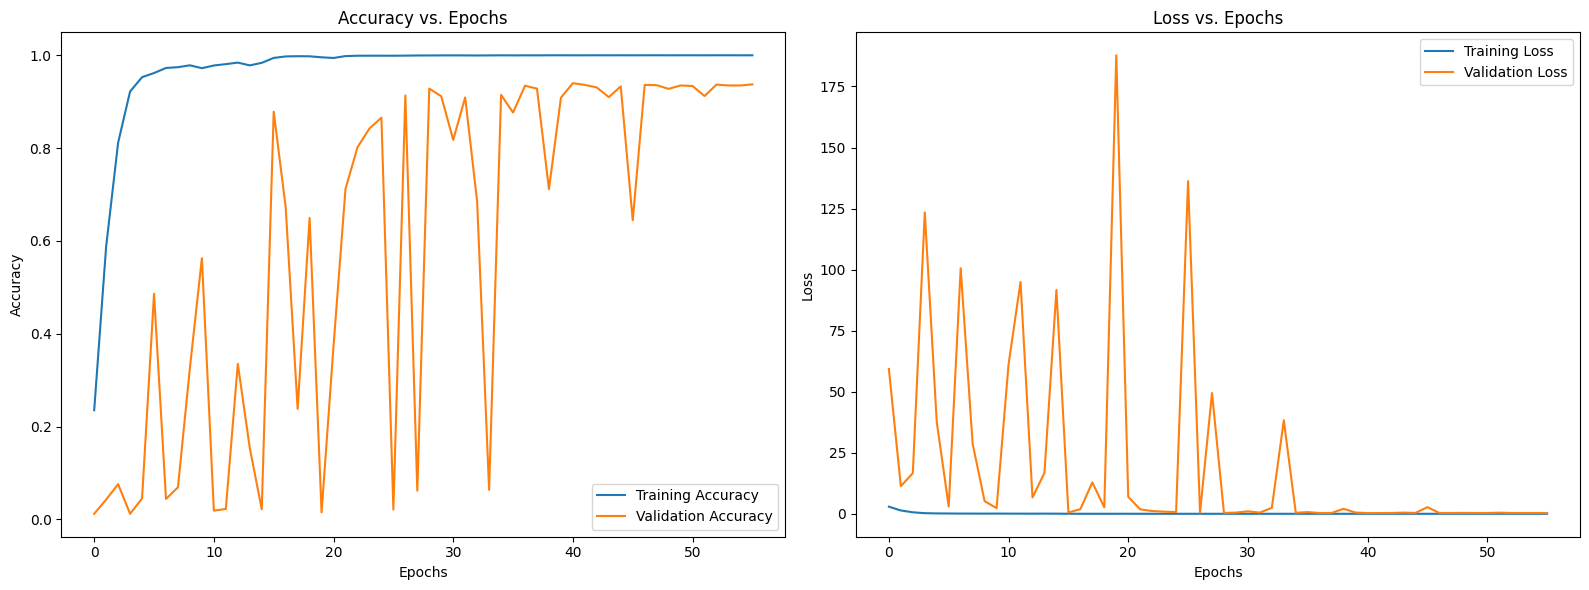

In [32]:
# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot training and validation accuracy in the first subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy vs. Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training and validation loss in the second subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss vs. Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Task 3: Train the model using a well-known CNN architecture

In [9]:
from tensorflow.keras.applications import MobileNet, MobileNetV3Small
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

## Preprocess Images

In [10]:
# Resize images for grayscale datasets
def preprocess_dataset(X, target_size=(224, 224)):
    processed_images = []
    for img in X:
        resized_img = cv2.resize(img, target_size).reshape(target_size[0], target_size[1], 1)  # Resize and reshape
        processed_images.append(resized_img)
    return np.array(processed_images)

# Apply preprocessing and overwrite datasets
X_train_augmented = preprocess_dataset(X_train_augmented)
X_val_reshaped = preprocess_dataset(X_val_reshaped)
X_test_reshaped = preprocess_dataset(X_test_reshaped)

# Verify updated shapes
print(f"Training Dataset Shape: {X_train_augmented.shape}")
print(f"Validation Dataset Shape: {X_val_reshaped.shape}")
print(f"Test Dataset Shape: {X_test_reshaped.shape}")

Training Dataset Shape: (19544, 224, 224, 1)
Validation Dataset Shape: (1629, 224, 224, 1)
Test Dataset Shape: (1629, 224, 224, 1)


## Define Transfer Learning Model

In [13]:
def create_mobilenet_modelv1(input_shape,num_classes):
    mobile_net_model = MobileNet(
            input_shape=input_shape,
            alpha=1.0,
            include_top=True,
            weights=None,
            pooling="max",
            classes=num_classes,
            classifier_activation="softmax",
            name=None,
        )
    return mobile_net_model

## Compile the Model

In [14]:
input_shape_mobilenetv1 = (224, 224, 1)  # Grayscale input
num_classes = y_train_augmented.shape[1]  # Number of classes

model_task3 = create_mobilenet_modelv1(input_shape_mobilenetv1, num_classes)
model_task3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Display the model summary
model_task3.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,312,338 (12.64 MB)

 Trainable params: 3,290,450 (12.55 MB)

 Non-trainable params: 21,888 (85.50 KB)

## Task 3 - Train MobileNetV1 from Scratch

In [15]:
# Train the model
history_task3 = model_task3.fit(
    X_train_augmented, y_train_augmented,
    validation_data=(X_val_reshaped, y_val_cat),
    epochs=100,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
    ],
    verbose=1
)

Epoch 1/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 101s 116ms/step - accuracy: 0.1363 - loss: 3.5324 - val_accuracy: 0.0123 - val_loss: 16.2864 - learning_rate: 0.0010
Epoch 2/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 52s 85ms/step - accuracy: 0.5400 - loss: 1.5335 - val_accuracy: 0.0184 - val_loss: 30.4662 - learning_rate: 0.0010
Epoch 3/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 53s 87ms/step - accuracy: 0.7746 - loss: 0.7432 - val_accuracy: 0.0331 - val_loss: 21.0467 - learning_rate: 0.0010
Epoch 4/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 54s 89ms/step - accuracy: 0.8931 - loss: 0.3582 - val_accuracy: 0.0123 - val_loss: 35.2883 - learning_rate: 0.0010
Epoch 5/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 54s 89ms/step - accuracy: 0.9476 - loss: 0.1894 - val_accuracy: 0.0374 - val_loss: 25.6027 - learning_rate: 0.0010
Epoch 6/100
611/611 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9470 - loss: 0.1698
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
611/611 ━━━━━━━━━━━━━━━━━━━━ 54s 89ms/step - accuracy:

In [17]:
# Evaluate Task 3 model (trained from scratch)
test_loss_task3, test_accuracy_task3 = model_task3.evaluate(X_test_reshaped, y_test_cat, verbose=1)
print(f"Task 3 - MobileNetV1 (Scratch): Test Loss: {test_loss_task3}, Test Accuracy: {test_accuracy_task3}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9210 - loss: 0.3125
Task 3 - MobileNetV1 (Scratch): Test Loss: 0.3005315661430359, Test Accuracy: 0.9238796830177307


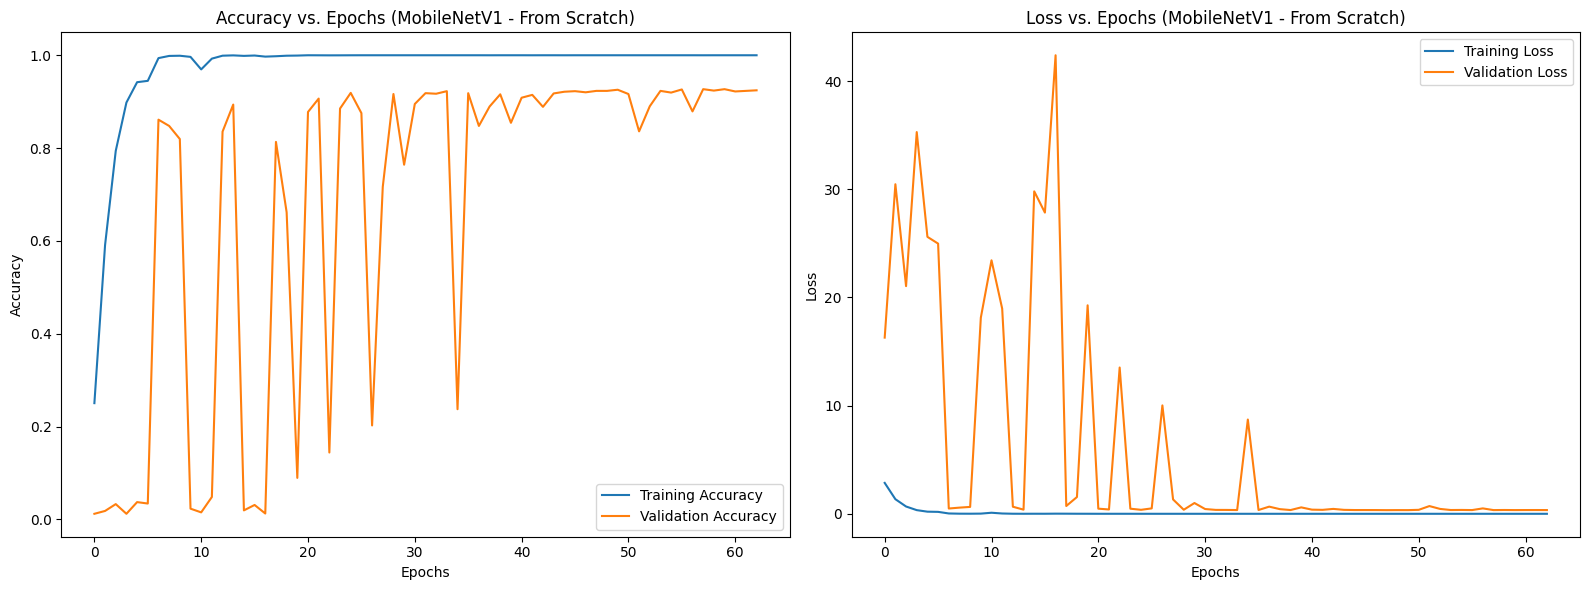

In [16]:
# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot training and validation accuracy in the first subplot
axes[0].plot(history_task3.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_task3.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy vs. Epochs (MobileNetV1 - From Scratch)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training and validation loss in the second subplot
axes[1].plot(history_task3.history['loss'], label='Training Loss')
axes[1].plot(history_task3.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss vs. Epochs (MobileNetV1 - From Scratch)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Task 4 - Transfer Learning with Pre-Trained MobileNetV1

## Define Pre-Trained Model with Transfer Learning

In [11]:
# Define the MobileNetV1 model with transfer learning
def create_mobilenet_transfer_model(input_shape, num_classes, train_base=False):
    # Initialize MobileNetV1 with pre-trained weights on ImageNet
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Convert input to accept 1 channel (grayscale) by adding a Conv2D layer to expand to 3 channels
    input_layer = Input(shape=input_shape)
    x = Conv2D(3, (3, 3), padding='same', activation='relu')(input_layer)  # Convert grayscale to RGB
    x = base_model(x)

    # Add custom classification layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=input_layer, outputs=output)

    # Optionally freeze the base model layers
    # if not train_base:
    #     for layer in base_model.layers:
    #         layer.trainable = False

    return model

## Training with Imported Weights (Pre-Trained)

In [12]:
# Create and compile the MobileNetV1 model with frozen base layers
input_shape_transfer = (224, 224, 1)  # Grayscale images
num_classes = y_train_augmented.shape[1]  # Number of classes

model_transfer = create_mobilenet_transfer_model(input_shape_transfer, num_classes, train_base=False)
model_transfer.compile(
    optimizer=Adam(learning_rate=0.001),  # Learning rate for frozen base layers
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history_transfer = model_transfer.fit(
    X_train_augmented, y_train_augmented,
    validation_data=(X_val_reshaped, y_val_cat),
    epochs=50,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 108s 125ms/step - accuracy: 0.2025 - loss: 3.3354 - val_accuracy: 0.4131 - val_loss: 2.0911 - learning_rate: 0.0010
Epoch 2/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 56s 91ms/step - accuracy: 0.6622 - loss: 1.1384 - val_accuracy: 0.5488 - val_loss: 1.7456 - learning_rate: 0.0010
Epoch 3/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 57s 93ms/step - accuracy: 0.8267 - loss: 0.5605 - val_accuracy: 0.6875 - val_loss: 1.2096 - learning_rate: 0.0010
Epoch 4/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 57s 94ms/step - accuracy: 0.8880 - loss: 0.3688 - val_accuracy: 0.3493 - val_loss: 3.7870 - learning_rate: 0.0010
Epoch 5/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 57s 94ms/step - accuracy: 0.9241 - loss: 0.2476 - val_accuracy: 0.6924 - val_loss: 1.1924 - learning_rate: 0.0010
Epoch 6/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 57s 94ms/step - accuracy: 0.9316 - loss: 0.2177 - val_accuracy: 0.6532 - val_loss: 1.4768 - learning_rate: 0.0010
Epoch 7/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 57s 94ms/step - accuracy: 0.9438 -

## Fine-Tuning the Pre-Trained Model

In [ ]:
# # Enable training for the base model layers
# for layer in model_transfer.layers:
#     layer.trainable = True

# # Recompile the model with a lower learning rate for fine-tuning
# model_transfer.compile(
#     optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Fine-tune the model
# history_fine_tune = model_transfer.fit(
#     X_train_augmented, y_train_augmented,
#     validation_data=(X_val_reshaped, y_val_cat),
#     epochs=30,
#     callbacks=[early_stopping, lr_scheduler],
#     verbose=1
# )

## Evaluate the Model

In [14]:
# Evaluate the fine-tuned model
test_loss_transfer, test_accuracy_transfer = model_transfer.evaluate(X_test_reshaped, y_test_cat, verbose=1)
print(f"Task 4 - MobileNetV1 (Transfer Learning): Test Loss: {test_loss_transfer}, Test Accuracy: {test_accuracy_transfer}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9414 - loss: 0.2981
Task 4 - MobileNetV1 (Transfer Learning): Test Loss: 0.23815320432186127, Test Accuracy: 0.9496623873710632


## Task 4: Plot Training History (Pre-Trained MobileNetV1)

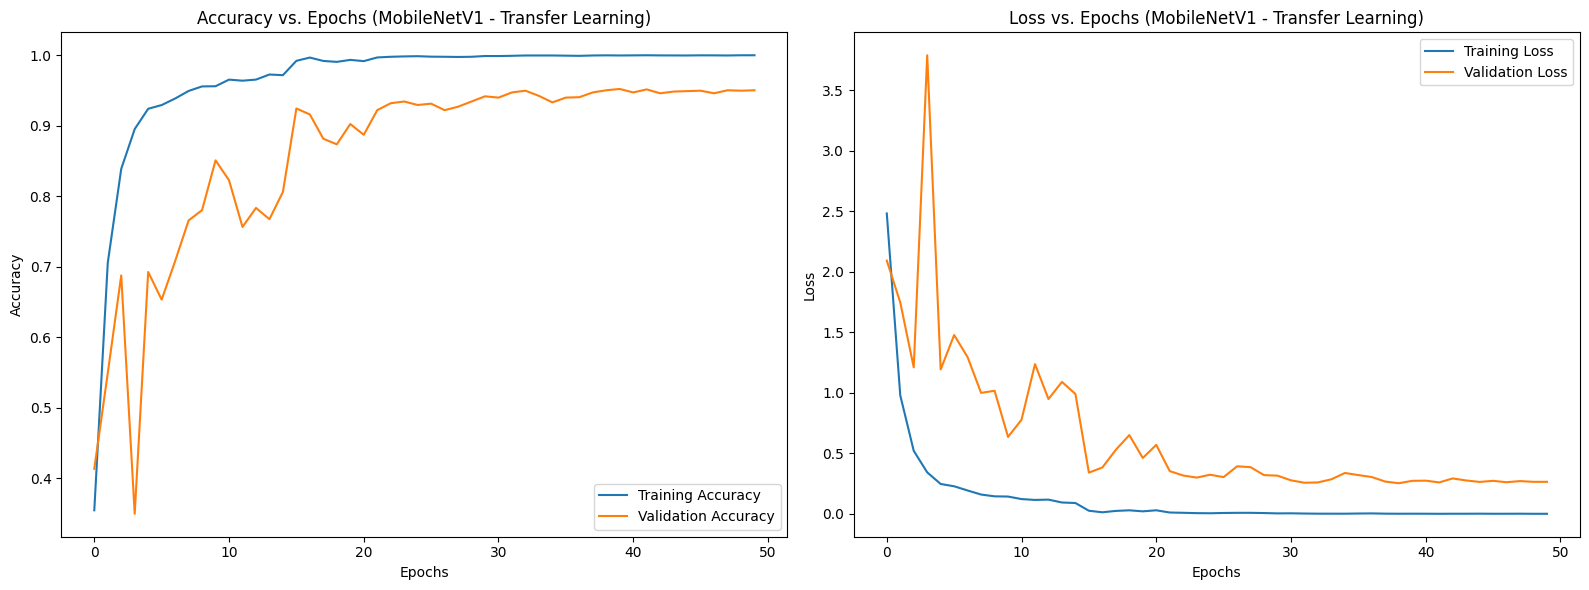

In [16]:
import matplotlib.pyplot as plt

def plot_task4_results(history_transfer):
    # Create the figure
    plt.figure(figsize=(16, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_transfer.history['accuracy'], label='Training Accuracy')
    plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs. Epochs (MobileNetV1 - Transfer Learning)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_transfer.history['loss'], label='Training Loss')
    plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs. Epochs (MobileNetV1 - Transfer Learning)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
plot_task4_results(history_transfer)